In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import cartopy.crs as ccrs
from cartopy.io.img_tiles import *

from scipy.ndimage.filters import gaussian_filter

%matplotlib inline
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

from pointprocess import *
import pointprocess.plotting as pplot
from lightning_setup import *

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
SR_LOC = os.environ.get('SR_LOC')

In [2]:
MAPBOX_TOKEN = os.environ['MAPBOX_TOKEN']

In [4]:
c = Region(city=cities['cedar'])
c.define_grid()

version1 = pd.HDFStore('store.h5')

centery = (c.gridy[:-1]+c.gridy[1:])/2.
centerx = (c.gridx[:-1]+c.gridx[1:])/2.

In [5]:
xmin, xmax = np.searchsorted(c.gridx, np.array([-112.4, -111.2]))
ymin, ymax = np.searchsorted(c.gridy, np.array([37.1, 38.3]))

In [6]:
esri_attr = 'basemap developed by © ESRI using GTOPO30, SRTM, and NED data from USGS'
esri_short_attr = 'basemap developed by © ESRI using data from USGS'
mapbox_attr = 'basemap developed by © Mapbox using data from © OpenStreetMap'
nat_attr = 'basemap made with Natural Earth'
nat_strm_attr = 'basemap made with Natural Earth using STRM data from USGS'

### JA Flash Density for CG 2010-2015

In [7]:
%%time
MMDC_grid = {}
MMFC_grid = {}
for m in [7,8]:
    ds = c.get_ds(y='201*', m=m, filter_CG=dict(method='CG'), cols=['strokes', 'amplitude', 'cloud_ground'])
    print(m)
    ds.close()
    MMFC_grid.update({m: c.FC_grid})

JAFC = MMFC_grid[7] + MMFC_grid[8]
JAFC_df = pd.DataFrame(data=JAFC, index=centery, columns=centerx)
version1['JAFC_2010_2015'] = JAFC_df

7
8
CPU times: user 26.4 s, sys: 948 ms, total: 27.4 s
Wall time: 47.6 s


In [7]:
JAFC_CG = version1['JAFC_2010_2015'].values

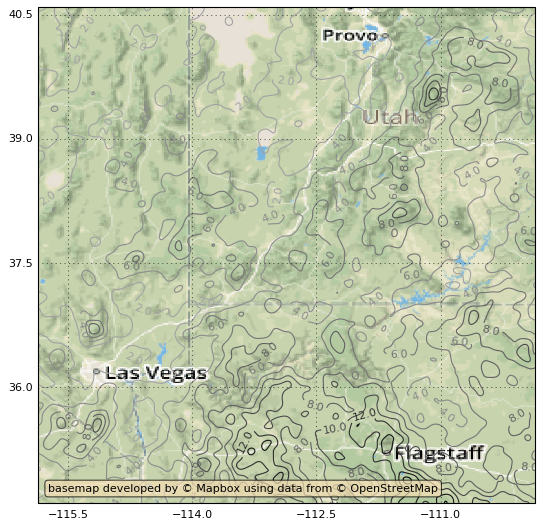

In [8]:
smoothed = gaussian_filter(JAFC_CG, 5)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, zoom=6, vmin=-10, N=10, fontsize=10, fmt='%1.1f',
                        tiler=MapboxTiles(MAPBOX_TOKEN, 'mapbox.streets'))
pplot.annotate_tiler(ax, mapbox_attr)
plt.savefig("./Figures/Fig 1. JA Flash Density 2010-2015.png")

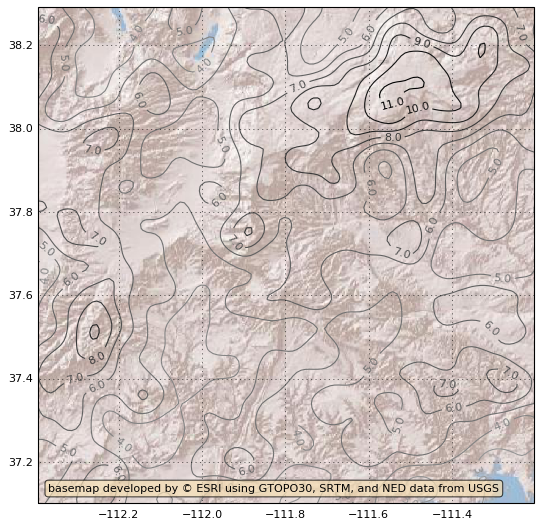

In [8]:
smoothed = gaussian_filter(JAFC_CG, 3)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, extent=[xmin, xmax, ymin, ymax], 
                        zoom=9, N=10, vmin=-5, tiler=pplot.ShadedReliefESRI())
pplot.annotate_tiler(ax, esri_attr)
plt.savefig("./Figures/Fig 6. JA Flash Density over EPK subregion 2010-2015.png")

In [11]:
%%time
JFC_grid = {}
AFC_grid = {}
for y in range(2010, 2016):
    ds = c.get_ds(m=7, y=y, filter_CG=dict(method='less_than', amax=-10))
    ds.close()
    JFC_grid.update({y: c.FC_grid})
    ds = c.get_ds(m=8, y=y, filter_CG=dict(method='less_than', amax=-10))
    ds.close()
    AFC_grid.update({y: c.FC_grid})
JAFC = np.sum(list(JFC_grid.values()), axis=0) + np.sum(list(AFC_grid.values()), axis=0)
JAFC_df = pd.DataFrame(data=JAFC, index=centery, columns=centerx)
version1['JAFC_2010_2015_10'] = JAFC_df

CPU times: user 19.6 s, sys: 343 ms, total: 20 s
Wall time: 19.7 s


In [13]:
JAFC_10 = version1['JAFC_2010_2015_10']

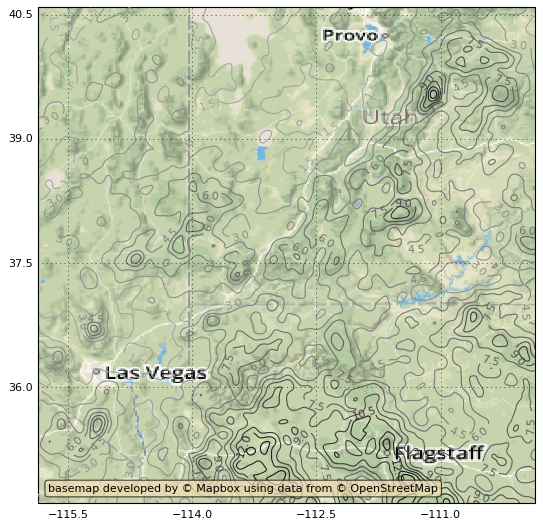

In [14]:
smoothed = gaussian_filter(JAFC_10, 5)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, zoom=6, vmin=-10, N=10, fontsize=10, fmt='%1.1f',
                        tiler=MapboxTiles(MAPBOX_TOKEN, 'mapbox.streets'))
pplot.annotate_tiler(ax, mapbox_attr)
plt.savefig("./Figures/Fig 1. JA Flash Density 2010-2015 (-10kA filtered).png")

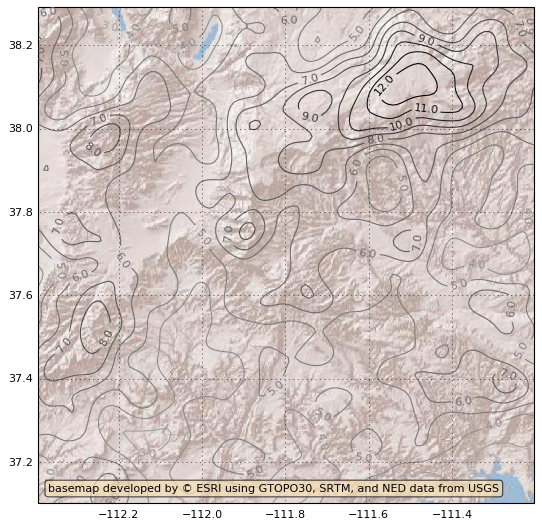

In [15]:
smoothed = gaussian_filter(JAFC_10, 3)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, extent=[xmin, xmax, ymin, ymax], 
                        zoom=9, N=10, vmin=-5, tiler=pplot.ShadedReliefESRI())
pplot.annotate_tiler(ax, esri_attr)
plt.savefig("./Figures/Fig 6.7 JA Flash Density over EPK subregion 2010-2015 (-10kA filtered).png")

In [9]:
%%time
JFC_grid = {}
AFC_grid = {}
for y in range(1996, 2016):
    ds = c.get_ds(m=7, y=y, filter_CG=dict(method='less_than', amax=-10))
    ds.close()
    JFC_grid.update({y: c.FC_grid})
    ds = c.get_ds(m=8, y=y, filter_CG=dict(method='less_than', amax=-10))
    ds.close()
    AFC_grid.update({y: c.FC_grid})
JAFC = np.sum(list(JFC_grid.values()), axis=0) + np.sum(list(AFC_grid.values()), axis=0)
version1['JAFC_1996_2015'] = JAFC_df

CPU times: user 55.3 s, sys: 701 ms, total: 56 s
Wall time: 55.2 s


In [16]:
JAFC = version1['JAFC_1996_2015'].values

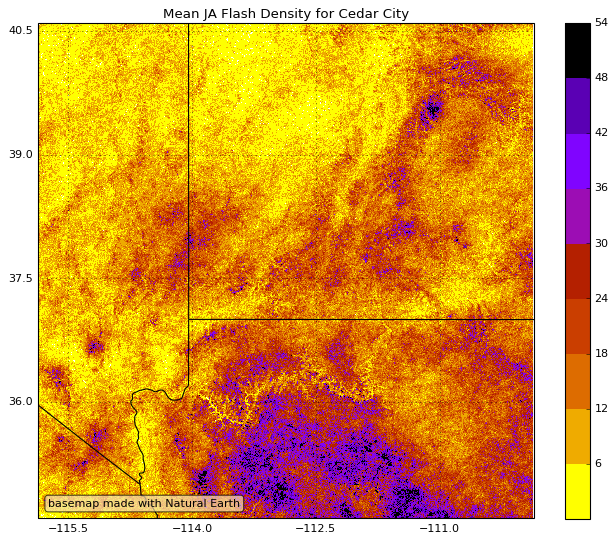

In [17]:
plt.figure(figsize=(10,8))
im, ax = c.plot_grid(JAFC, cmap=cmap, vmin=.001, vmax=54, zorder=-1, cbar=True);
pplot.annotate_tiler(ax, nat_attr)
plt.title("Mean JA Flash Density for Cedar City")
plt.savefig("./Figures/Fig 1.6 JA Flash Density 1996-2015.png")

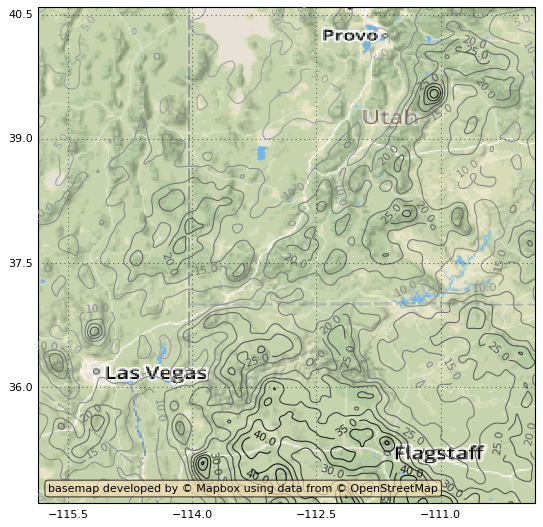

In [18]:
smoothed = gaussian_filter(JAFC, 5)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, zoom=6, vmin=-30, N=10, fontsize=10,
                        tiler=MapboxTiles(MAPBOX_TOKEN, 'mapbox.streets'))
pplot.annotate_tiler(ax, mapbox_attr)
plt.savefig("./Figures/Fig 1.5 JA Flash Density 1996-2015.png")

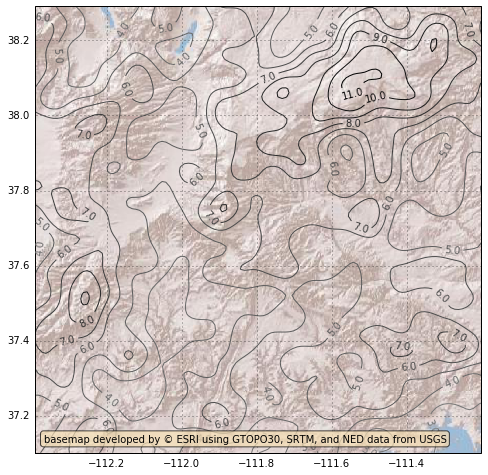

In [22]:
smoothed = gaussian_filter(JAFC, 3)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, extent=[xmin, xmax, ymin, ymax],
                        zoom=9, N=10, vmin=-10, tiler=pplot.ShadedReliefESRI())
pplot.annotate_tiler(ax, esri_attr)
plt.savefig("./Figures/Fig 6.5 JA Flash Density over EPK subregion 1996-2015.png")

## Hour of Peak

In [31]:
%%time
JDC_grid = {}
ADC_grid = {}
for y in range(1996, 2016):
    ds = c.get_ds(m=7, y=y, filter_CG=dict(method='less_than', amax=-10))
    c.to_DC_grid(ds)
    ds.close()
    JDC_grid.update({y: c.DC_grid})
    ds = c.get_ds(m=8, y=y, filter_CG=dict(method='less_than', amax=-10))
    c.to_DC_grid(ds)
    ds.close()
    ADC_grid.update({y: c.DC_grid})
hourly3D = {}
for y in range(1996, 2016):
    hourly3D.update({y: np.stack(JDC_grid[y].values())+ np.stack(ADC_grid[y].values())})
h3D = hourly3D[1996]
for y in range(1996, 2016):
    h3D+=hourly3D[y]
p = pd.Panel(data=h3D, items=list(range(24)), major_axis=centery, minor_axis=centerx)
version1['JADC_1996_2015'] = p

CPU times: user 1min 28s, sys: 1.3 s, total: 1min 29s
Wall time: 1min 28s


In [19]:
h3D = version1['JADC_1996_2015'].values

In [35]:
h3D.shape

(24, 600, 601)

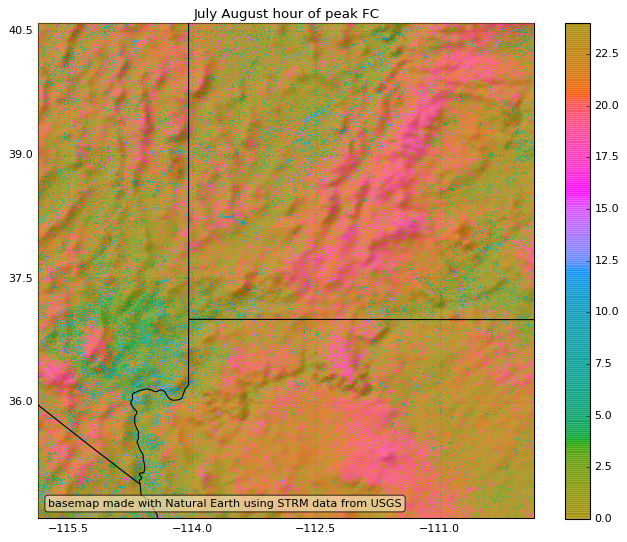

In [23]:
plt.figure(figsize=(10,8))

cmap_husl = mpl.colors.ListedColormap(sns.husl_palette(256, .2, l=.6, s=1))
peak_time = np.argmax(h3D, axis=0)

im, ax = c.plot_grid(peak_time, cmap=cmap_husl, vmin=0, vmax=24, cbar=True, alpha=.8, zorder=5)
pplot.pre_shaded(ax, fname=SR_LOC)
pplot.annotate_tiler(ax, nat_strm_attr)
ax.set_extent([c.gridx.min(), c.gridx.max(), c.gridy.min(), c.gridy.max()])
ax.set_title('July August hour of peak FC');

plt.savefig('./Figures/Fig 2. JA hour of peak Flash Density.png')

## amplitude of DC
[Top](#Regional-Climatology) | [Region](#object-orientation) | [flash density](#flash-density) | [diurnal cycle](#diurnal-cycle) | [Largest 100](#top-100) | [peak](#peak-time) | [amplitude diurnal cycle](#amplitude-of-DC) | [CG amplitude](#CG-amplitude)

 - “Amplitude” of the diurnal cycle; 1 hour time resolution ~1km grid.  CG flash density at the time of maximum flash density - CG flash density a time of minimum flash density divided by the mean flash density. 

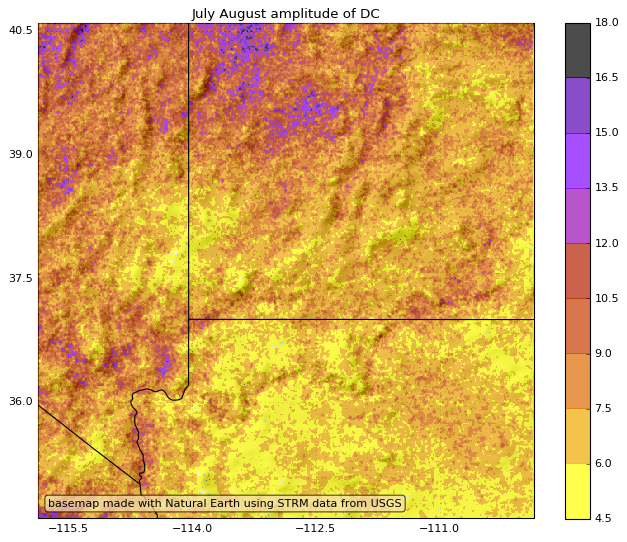

In [24]:
plt.figure(figsize=(10, 8))

amplitude = ((np.max(h3D, axis=0)-np.min(h3D, axis=0))/np.mean(h3D, axis=0))
amplitude = np.nan_to_num(amplitude)
smoothed = gaussian_filter(amplitude, 1)
im, ax = c.plot_grid(smoothed, cmap=cmap, vmin=4.5, vmax=18, cbar=True, zorder=5, alpha=.7)
pplot.pre_shaded(ax, fname=SR_LOC)
pplot.annotate_tiler(ax, nat_strm_attr)
ax.set_extent([c.gridx.min(), c.gridx.max(), c.gridy.min(), c.gridy.max()])
ax.set_title('July August amplitude of DC')
plt.savefig('./Figures/Fig 3. JA amplitude of diurnal cycle.png')

## Daily Flash Count

In [4]:
%%time 

def get_FC(y):
    ds = c.get_ds(y=y, filter_CG=dict(method='less_than', amax=-10), func=None)
    df = ds.to_dataframe()
    ds.close()
    df.index = df.time
    FC = df['lat'].resample('24H', base=12, label='right').count()
    FC.name = 'FC'
    return FC

FC = get_FC(1996)
for y in range(1997,2016):
    FC = pd.concat([FC, get_FC(y)])

version1['FC_1996_2015'] = FC

CPU times: user 2min 48s, sys: 3.79 s, total: 2min 52s
Wall time: 3min 24s


In [25]:
FC = version1['FC_1996_2015']

In [26]:
ngrid_cells = 600*601

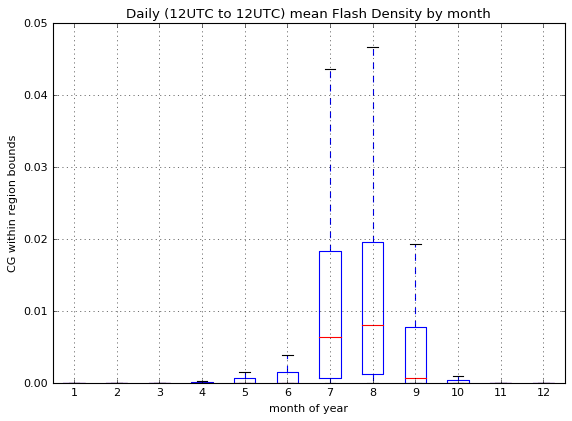

In [27]:
title = 'Daily (12UTC to 12UTC) mean Flash Density by month'

df = FC.to_frame()/ngrid_cells
df.boxplot(column='FC', by=df.index.month, sym='', figsize=(8,6))
plt.xlabel('month of year')
plt.ylabel('CG within region bounds')
plt.suptitle('')
plt.title(title)
plt.savefig('./Figures/Fig 4. Boxplots of daily mean Flash Density by month.png')

In [28]:
trange = pd.date_range('1996', '2016')

In [15]:
%%time
dflist = []
for t in trange:
    ds = c.get_daily_ds(t, filter_CG=dict(method='less_than', amax=-10))
    try:
        ds.close()
        d = c.area_over_thresh([1,2], return_dict=True, print_out=False)
    except:
        d = {1:0, 2:0}
    dflist.append(pd.DataFrame(d, index=[t]))

area_over_thresh = pd.concat(dflist)
version1['area_over_thresh_1996_2015'] = area_over_thresh

CPU times: user 2min 24s, sys: 1.14 s, total: 2min 25s
Wall time: 2min 44s


In [29]:
area_over_thresh = version1['area_over_thresh_1996_2015']

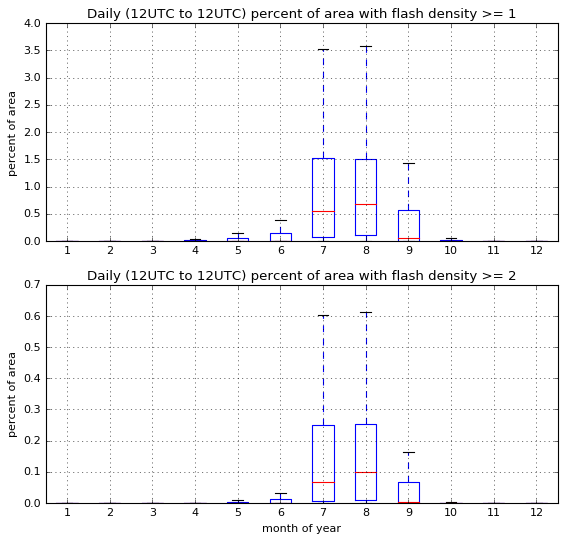

In [30]:
df = area_over_thresh*100/ngrid_cells

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,8))
fig.suptitle('')

for j in [1,2]:
    title = 'Daily (12UTC to 12UTC) percent of area with flash density >= {j}'.format(j=j)
    ax = axes[j-1]
    df.boxplot(column=j, by=df.index.month, sym='', ax=ax)
    if j ==1:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('month of year')
    ax.set_ylabel('percent of area')
    
    #plt.yscale('log')
    ax.set_title(title)
    plt.suptitle(' ')
    plt.savefig('./Figures/Fig 5. Boxplots of percent area above specific Flash Density by month.png')

## CG Flash Density and Precipitable Water

In [31]:
df = pd.read_csv('./data/pwv147215720409387.txt', delim_whitespace=True, skiprows=[1])

In [33]:
def dateparser(y, j, t):
    x = ' '.join([y, str(int(float(j))), t])
    return pd.datetime.strptime(x, '%Y %j %H:%M:%S')

df = pd.read_csv('./data/pwv147215720409387.txt', delim_whitespace=True, skiprows=[1], na_values=[-9.99],
                 parse_dates={'time': [1,2,3]}, date_parser=dateparser, index_col='time')

In [56]:
IPW = df.resample('24H', base=12, label='right').mean()['IPW']

In [57]:
c.SUBSETTED = False
c.CENTER = (37.7, -111.8)
c.RADIUS = 0.6

In [58]:
c.define_grid()

In [59]:
%%time 

def get_FC(y):
    ds = c.get_ds(y=y, filter_CG=dict(method='less_than', amax=-10), func=None)
    df = ds.to_dataframe()
    ds.close()
    df.index = df.time
    FC = df['lat'].resample('24H', base=12, label='right').count()
    FC.name = 'FC'
    return FC

FC = get_FC(2010)
for y in range(2011,2016):
    FC = pd.concat([FC, get_FC(y)])

version1['EPK_FC_2010_2015'] = FC

CPU times: user 57.9 s, sys: 2.22 s, total: 1min
Wall time: 1min 13s


In [62]:
EPK_FC = version1['EPK_FC_2010_2015']

In [63]:
EPK_ngrids = c.gridx.shape[0]*c.gridy.shape[0]

In [130]:
df = pd.concat([IPW, EPK_FC/EPK_ngrids], axis=1)

In [131]:
df.columns = ['IPW', 'FD']

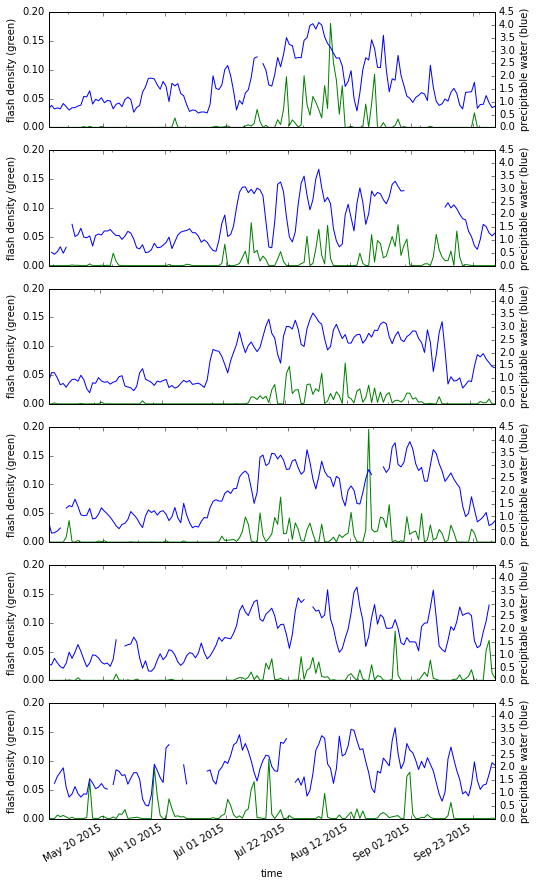

In [76]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8,16))
for y, ax in zip(range(2010, 2016), axes):
    df['{y}-5'.format(y=y):'{y}-9'.format(y=y)].plot(secondary_y='IPW', ax=ax, legend=False)
    ax.set_ylim(0,.2)
    ax.set_ylabel('flash density (green)')
    ax.right_ax.set_ylabel('precipitable water (blue)')
    ax.right_ax.set_ylim(0, 4.5)
#     ax.legend(loc='upper left')
#     ax.right_ax.legend(loc='upper right')
plt.savefig('./Figures/Fig 5.5 Time series of daily CG flash density and precipitable water.png')

In [132]:
df['IPW bin'] = 4.5

In [133]:
for i in np.flipud(np.arange(.5, 4.5, .5)):
    df['IPW bin'].loc[df['IPW']<(i+.25)] = i

In [134]:
df = df.drop('IPW', axis=1)

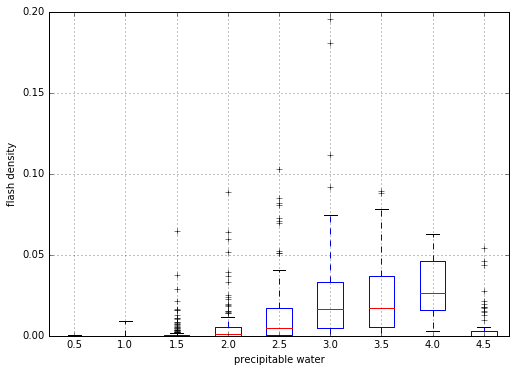

In [138]:
df.boxplot(by='IPW bin', figsize=(8,6))
plt.title('')
plt.suptitle('')
plt.ylabel('flash density')
plt.xlabel('precipitable water')
plt.ylim(0,.2)
plt.savefig('./Figures/Fig 5.6 Daily CG Flash Density vs Precipitable Water 2010-2015.png')

## Top n FC days

In [6]:
ngrid_cells = 600*601

In [7]:
FC = version1['FC_1996_2015']

In [8]:
top50 = FC.sort_values(ascending=False).head(50)/ngrid_cells

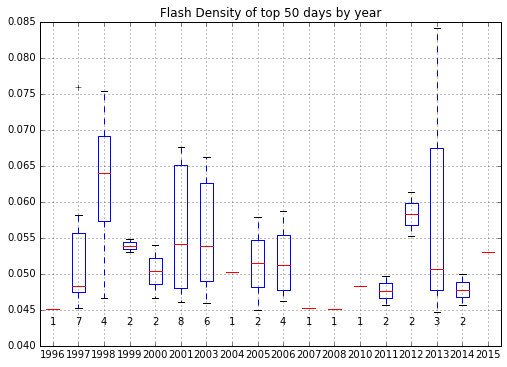

In [123]:
df = top50.to_frame()
FC_yearly = df.groupby(df.index.year).count()
df.boxplot(column='FC', by=df.index.year, figsize=(8,6))
for i in range(1,FC_yearly.size):
    plt.text(i, .043, FC_yearly.iloc[i-1,0], horizontalalignment='center')
plt.xlabel('')
plt.title('Flash Density of top 50 days by year')
plt.suptitle('');

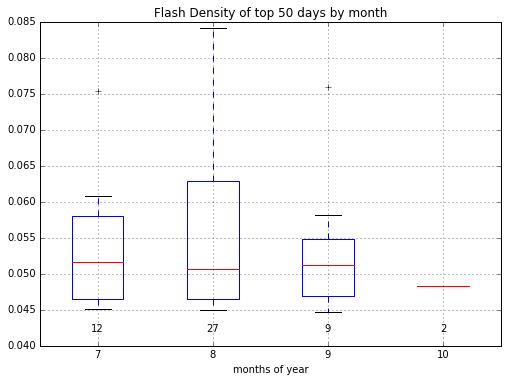

In [124]:
FC_monthly = df.groupby(df.index.month).count()
df.boxplot(column='FC', by=df.index.month, figsize=(8,6))
for i in range(1,FC_monthly.size+1):
    plt.text(i, .042, FC_monthly.iloc[i-1,0], horizontalalignment='center')
plt.xlabel('months of year')
plt.title('Flash Density of top 50 days by month')
plt.suptitle('')
plt.savefig('./Figures/Fig 4.5 Boxplots of daily mean Flash Density by month Top50.png')

## Climatology of top events

In [8]:
filter_dict = dict(method='less_than', amax=-1)

In [13]:
%%time
n=50
FC_grid = np.zeros((centery.shape[0], centerx.shape[0]))
for t in top50.index[:n]:
    ds = c.get_daily_ds(t, filter_CG=filter_dict, func='grid')
    ds.close()
    FC_grid+=c.FC_grid
version1['top50_FC_1996_2015'] = pd.DataFrame(data=FC_grid, index=centery, columns=centerx)

CPU times: user 5.21 s, sys: 49.1 ms, total: 5.26 s
Wall time: 5.25 s


In [15]:
FC_grid = version1['top50_FC_1996_2015'].values

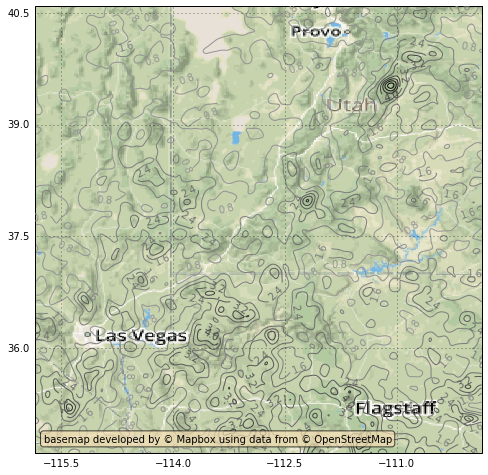

In [26]:
smoothed = gaussian_filter(FC_grid, 5)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, zoom=6, vmin=-5, N=10, fontsize=10,
                        tiler=MapboxTiles(MAPBOX_TOKEN, 'mapbox.streets'))
pplot.annotate_tiler(ax, mapbox_attr)
plt.savefig("./Figures/Fig 1.7 Top50 Flash Density 1996-2015.png")

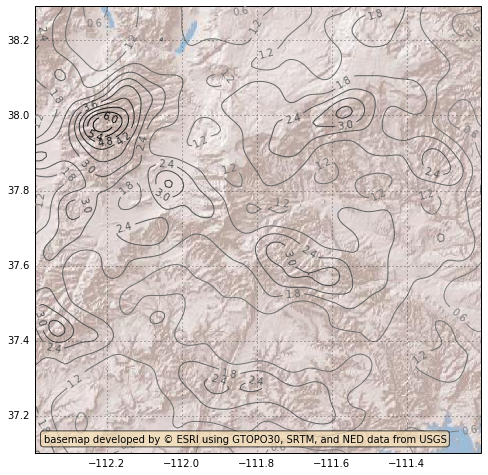

In [18]:
smoothed = gaussian_filter(FC_grid, 3)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, extent=[xmin, xmax, ymin, ymax],
                        zoom=9, N=10, vmin=-7, tiler=pplot.ShadedReliefESRI())
pplot.annotate_tiler(ax, esri_attr)
plt.savefig("./Figures/Fig 6.6 Top50 Flash Density over EPK subregion.png")

## Climatology of Tracks

In [9]:
buf_feat = pd.HDFStore('buffered_features.h5')

In [305]:
%%time

test_all = None
for t in top50.index:
    try:
        p = buf_feat['aspect_buffered_{t}'.format(t=t.date())]
        test = p[:, :, ['Bearing', 'centroidX', 'centroidY']].to_frame(filter_observations=False).T
        test = pd.concat([test[i] for i in p.major_axis]).dropna()
        test_all = pd.concat([test_all, test])
    except:
        print(t)
        continue

1997-10-03 12:00:00


In [306]:
test_all.shape

(46316, 3)

In [307]:
test=test_all

In [308]:
test['Bearing'][test['Bearing']<0] = test['Bearing'] + 360

In [309]:
test = test.reset_index().drop('index', axis=1)

In [367]:
N=16

In [368]:
theta = np.linspace(0.0, 2 *np.pi, N+1)

In [369]:
bins=(theta/np.pi*180)

In [370]:
c.define_grid(step=.1)

In [371]:
grid, _, = np.histogramdd([test['Bearing'], test['centroidY'], test['centroidX']], bins=[bins, c.gridy, c.gridx])

In [372]:
direction = grid.argmax(axis=0)

In [375]:
cmap_husl = mpl.colors.ListedColormap(sns.husl_palette(256, .2, l=.6, s=1))
cmap_husl.set_under('None')

In [378]:
grid.argmax(axis=0)

array([[13,  0, 11, ..., 12,  4,  8],
       [ 1,  7,  7, ...,  7,  3,  1],
       [ 8,  7,  2, ...,  7,  1,  0],
       ..., 
       [13,  1,  0, ..., 15,  8,  0],
       [ 0,  8,  7, ...,  2,  8, 12],
       [ 0,  0,  0, ...,  0,  0,  0]])

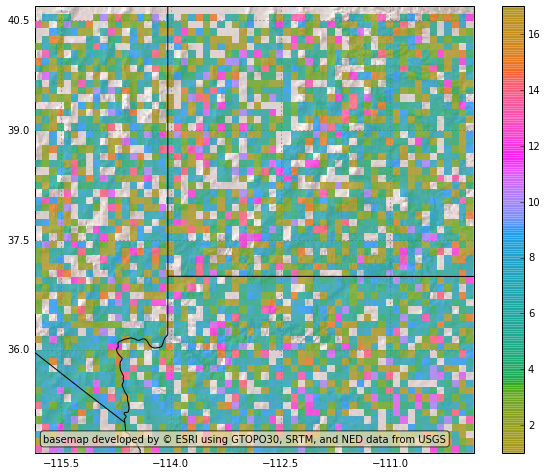

In [379]:
plt.figure(figsize=(10,8))
im, ax = c.plot_grid(grid.argmax(axis=0), cmap=cmap_husl, vmin=1, vmax=17, alpha=.7, cbar=True)
ax.add_image(pplot.ShadedReliefESRI(),6)
pplot.annotate_tiler(ax, esri_attr)
plt.savefig('./Figures/Fig 5.2 Top 50 storm mean direciton of motion.png')

CPU times: user 6min 34s, sys: 384 ms, total: 6min 34s
Wall time: 6min 34s


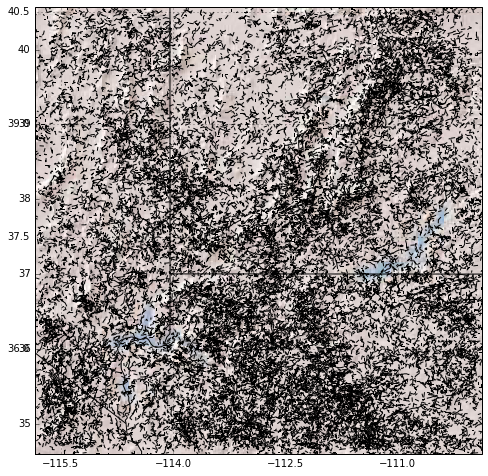

In [293]:
%%time
t = top50.index[0]
p = buf_feat['aspect_buffered_{t}'.format(t=t.date())]
ft = Features(p)
df0 = ft.titanize()
ax = pplot.feature_locations(df0, tiler=ShadedReliefESRI(), features=False, paths=True)
for t in top50.index[1:]:
    try:
        p = buf_feat['aspect_buffered_{t}'.format(t=t.date())]
    except KeyError:
        continue
    ft = Features(p)
    df1 = ft.titanize()
    ax = pplot.feature_locations(df1, ax=ax, features=False, paths=True)
plt.savefig('./Figures/Fig 5.2 Top 50 storm mean motion vectors.png')

In [331]:
%%time
N=8
radii = np.zeros(N)
for i, t in enumerate(top50.index):
    try:
        p = buf_feat['aspect_buffered_{t}'.format(t=str(t.date()))]
        radii+=agg_bearing(p, N=N)
    except:
        print(i)
        continue

32
CPU times: user 364 ms, sys: 16.1 ms, total: 380 ms
Wall time: 371 ms


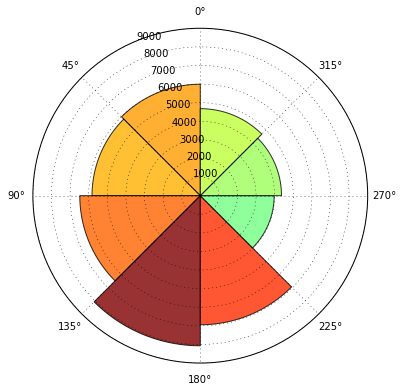

In [321]:
plt.figure(figsize=(6,6))
bearing_plot(radii, N=N)
plt.savefig('./Figures/Fig 5.1 Top 50 storm bearing plot of motion.png')

In [295]:
def agg_bearing(p, N=16):
    bearing = p[:,:,'Bearing']
    bearing[bearing<0] = bearing[bearing<0] + 360

    theta = np.linspace(0.0, 2 *np.pi, N+1)
    radii, _ = np.histogram(bearing.unstack().dropna().values, bins=(theta/np.pi*180))
    return radii

In [315]:
def bearing_plot(radii, ax=None, N=16,  bottom=0):
    if ax is None:
        ax = plt.subplot(111, polar=True)
    theta = np.linspace(0.0, 2 *np.pi, N+1)
    width = (2*np.pi) / N
    bars = ax.bar(theta[:-1], radii, width=width, bottom=bottom)
    ax.set_theta_zero_location("N")
    #ax.set_theta_direction(-1)

    # Use custom colors and opacity
    for r, bar in zip(radii, bars):
        bar.set_facecolor(plt.cm.jet(r/float(np.max(radii))))
        bar.set_alpha(0.8)
    return ax

How can we do initiation?

Should it be first event of the day - do we exclude strikes occuring at near 12:00? First location of the track? 

In [46]:
df=None
for i, t in enumerate(top50.index):
    try:
        p = buf_feat['aspect_buffered_{t}'.format(t=t.date())]
        if p.items[0].hour!=12:
            df = pd.concat([df, p.iloc[0,:,0:2].dropna()])
    except:
        print(i)
        continue

32


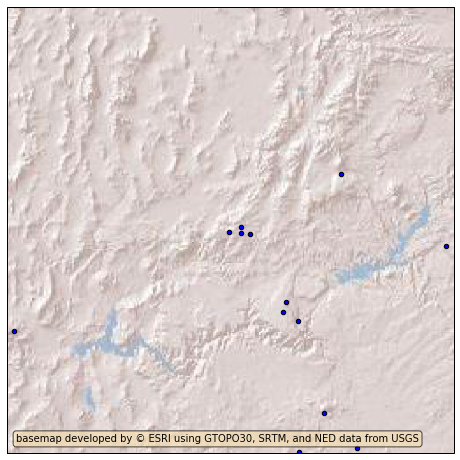

In [47]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_image(pplot.ShadedReliefESRI(), 6)
df.plot.scatter(x='centroidX', y='centroidY', ax=ax)
ax.set_extent([c.gridx.min()+.2, c.gridx.max()-.2, c.gridy.min()+.2, c.gridy.max()-.2])
pplot.annotate_tiler(ax, esri_attr)
plt.savefig('./Figures/Fig 5.3 Top 50 storm event initiation (without 12:00).png')

## Case Studies

In [10]:
from titan import *

In [67]:
#choose an interesting day
# t = '2010-07-20'
# t = '2011-08-21'
t = '2012-08-19'

In [59]:
%%time
computed = pd.HDFStore('cedar/features.h5')
p = computed['features_1km5min_thresh01_sigma3_minarea4_const5_{t}'.format(t=t)]
computed.close()

p = p['2011-08-21 12:00':'2011-08-22 12:00',:,:]

feat = pd.HDFStore('./Figures/{t}/features.h5'.format(t=t))
feat['unbuffered'] = p
p = db.add_buffer(p, aspect=True)
feat['aspect_buffered'] = p
feat.close()

CPU times: user 58.5 s, sys: 65.8 ms, total: 58.6 s
Wall time: 59.1 s


In [68]:
box, tr = c.get_daily_grid_slices(t, filter_CG=dict(method='less_than', amax=-10), base=12)

# initialixe databox object
db = c.to_databox(box, tr[0:-1])

fname = '../../lightning/{t}.txt'.format(t=t)
df = read_TITAN(fname)

feat = pd.HDFStore('./Figures/{t}/features.h5'.format(t=t))
p = feat['aspect_buffered']
feat.close()

ft = Features(p[df.index[0]:df.index[-1],:,:])
df_light = ft.titanize()

In [69]:
fig_start=13

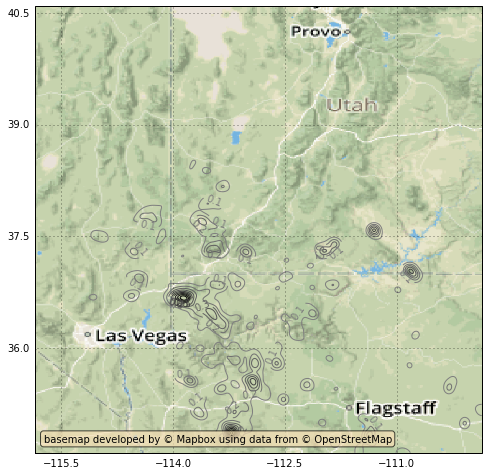

In [70]:
smoothed = gaussian_filter(db.box.sum(axis=0), 5)
ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, zoom=6, vmin=-1, N=10, fontsize=10,
                        tiler=MapboxTiles(MAPBOX_TOKEN, 'mapbox.streets'))
pplot.annotate_tiler(ax, mapbox_attr)
plt.savefig("./Figures/Fig {f}.3 {t} Flash Density.png".format(f=fig_start+1, t=t))

In [71]:
extent =[-112.4, -111.2, 37.1, 38.3]

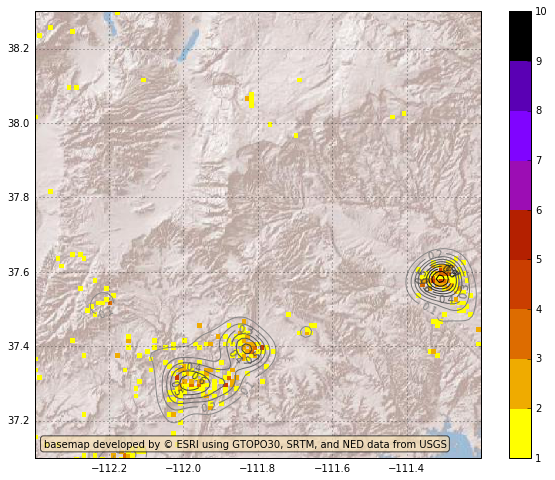

In [72]:
smoothed = gaussian_filter(db.box.sum(axis=0), 3)

ax = pplot.plot_contour(c.gridy, c.gridx, smoothed, extent=[xmin, xmax, ymin, ymax],
                        zoom=9, N=10, vmin=-1, tiler=pplot.ShadedReliefESRI())
db.plot_grid(ax=ax, cmap=cmap, vmin=1, vmax=10, cbar=True, zorder=.5)
ax.set_extent(extent)
pplot.annotate_tiler(ax, esri_attr);
plt.savefig("./Figures/Fig {f}.4 {t} Flash Density over EPK subregion.png".format(f=fig_start+1, t=t))

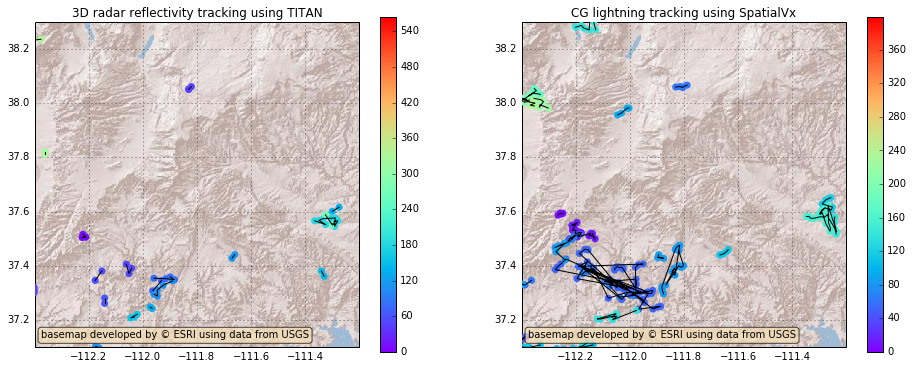

In [73]:
plt.figure(figsize=(16, 6))

ax1 = pplot.gridlines(plt.subplot(122, projection=ccrs.PlateCarree()))
ax1.add_image(pplot.ShadedReliefESRI(), 9)
ax1 = pplot.feature_locations(df, lat='ReflCentroidLat(deg)', lon='ReflCentroidLon(deg)', ax=ax1, paths=True)
pplot.annotate_tiler(ax1, esri_short_attr)
ax1.set_ylabel('')
ax1.set_extent(extent)
ax1.set_title('CG lightning tracking using SpatialVx')
#extent = ax1.get_extent()

ax2 = pplot.gridlines(plt.subplot(121, projection=ccrs.PlateCarree()))
ax2.add_image(pplot.ShadedReliefESRI(), 9)
ax2 = pplot.feature_locations(df_light, lat='centroidY' ,lon='centroidX', paths=True, ax=ax2)
pplot.annotate_tiler(ax2, esri_short_attr)
ax2.set_ylabel('')
ax2.set_extent(extent)
ax2.set_title('3D radar reflectivity tracking using TITAN')

plt.savefig('./Figures/Fig {f}. {t} Storm tracks from radar and lightning.png'.format(f=fig_start, t=t))

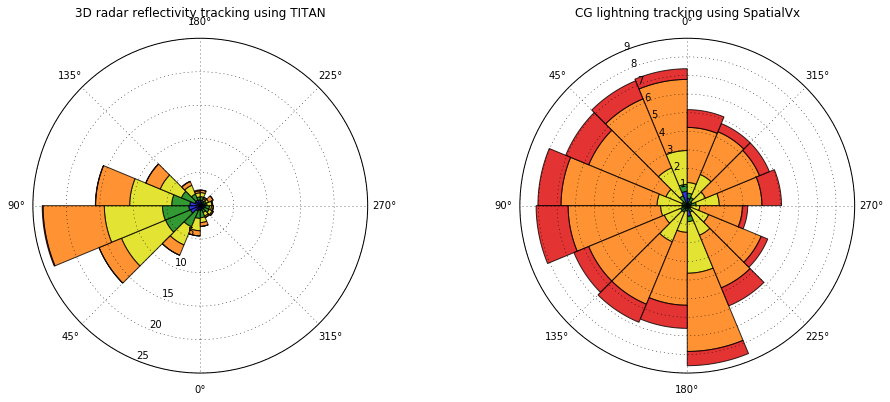

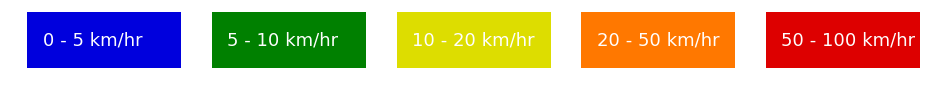

In [74]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121, polar=True)
windrose(df, ax=ax1, N=16)
ax1.set_title('3D radar reflectivity tracking using TITAN')

ax2 = plt.subplot(122, polar=True)
ft.windrose(ax=ax2, N=16, cbar=False)
ax2.set_title('CG lightning tracking using SpatialVx')

plt.savefig('./Figures/Fig {f}. {t} Storm motion from radar and lightning.png'.format(f=fig_start+1, t=t))

pplot.windrose_cbar(plt.figure(figsize=(16,1)));